In [1]:
import numpy as np
import cygnus_lib as cy
import matplotlib.pyplot as plt
import mylib as my
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
%matplotlib inline
x_resolution = y_resolution = 2048
from itertools import combinations
pixelscale  = 0.125 #55e-3 #Orange 0.125 for lemonn mm/pixel

In [34]:

nsigma      = 1
run         = 87
traccia     = 5 #3
cimax       = 130
cimin       = 95# 85
dataSelection = 'BTF'
image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    m_image = cy.read_image_h5(fileoutm)
    PedOverMax = m_image[m_image > cimax].size
    print ("Pedestal mean: %.2f, sigma: %.2f, over th. (%d) %d" % 
       (m_image[m_image<cimax].mean(), 
        np.sqrt(m_image[m_image<cimax].var()), cimax,
        (m_image>cimax).sum()))
except:
    print ("No Pedestal file for run %s, run script runs-pedestals.ipynb" % run)
    print ("STOP")

try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    s_image = cy.read_image_h5(fileouts)
    print ("Sigma mean: %.2f, sigma: %.2f, over th. (50) %d" % 
   (s_image[s_image<50].mean(), 
    np.sqrt(s_image[s_image<50].var()), 
    (s_image>50).sum()))
except:
    print ("No Sigma file for run %s, run script runs-pedestals.ipynb" % run)
    print ("STOP")

th_image    = np.round(m_image + nsigma*s_image)

Pedestal mean: 101.78, sigma: 1.03, over th. (130) 78
Sigma mean: 2.67, sigma: 2.13, over th. (50) 12


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


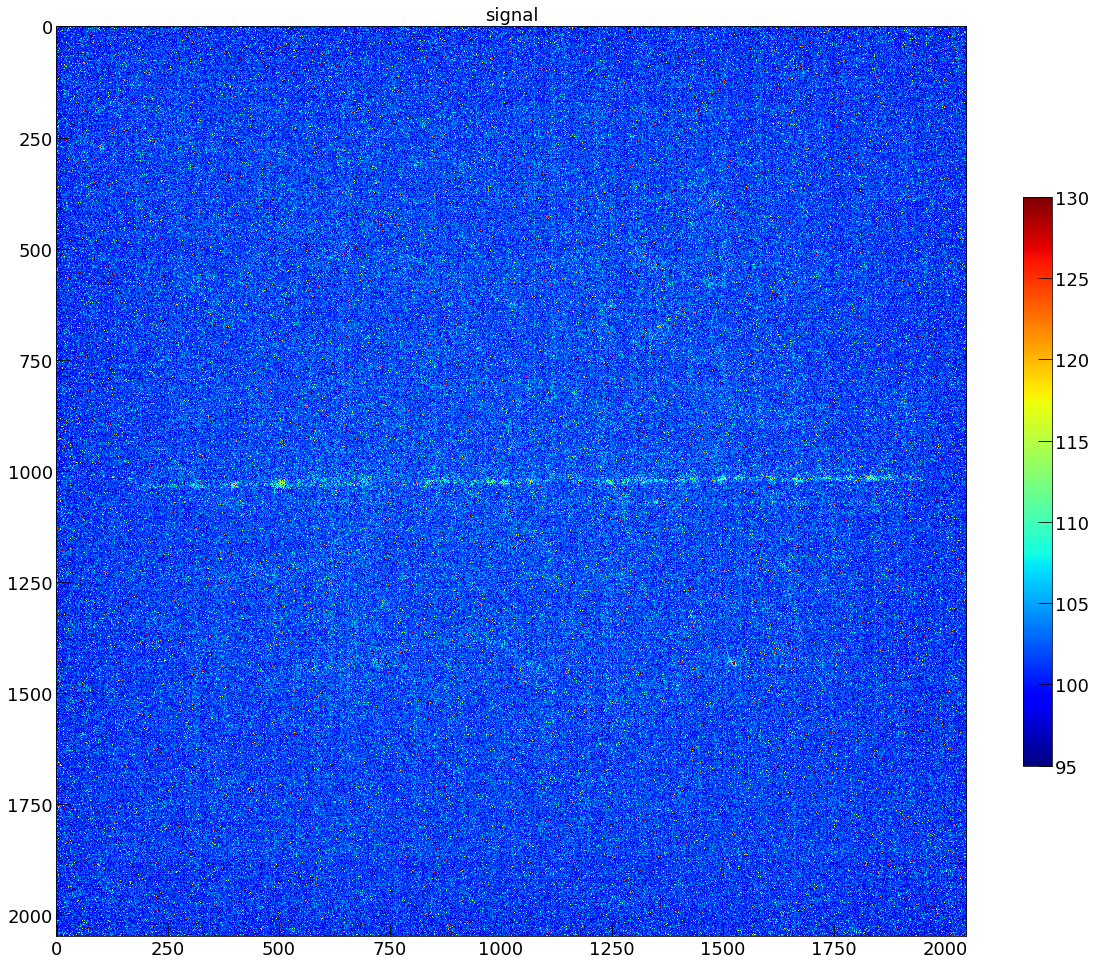

In [35]:
cy.set_atlas_style("large")
plt.imshow(image, vmin=cimin,vmax=cimax, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("signal")
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


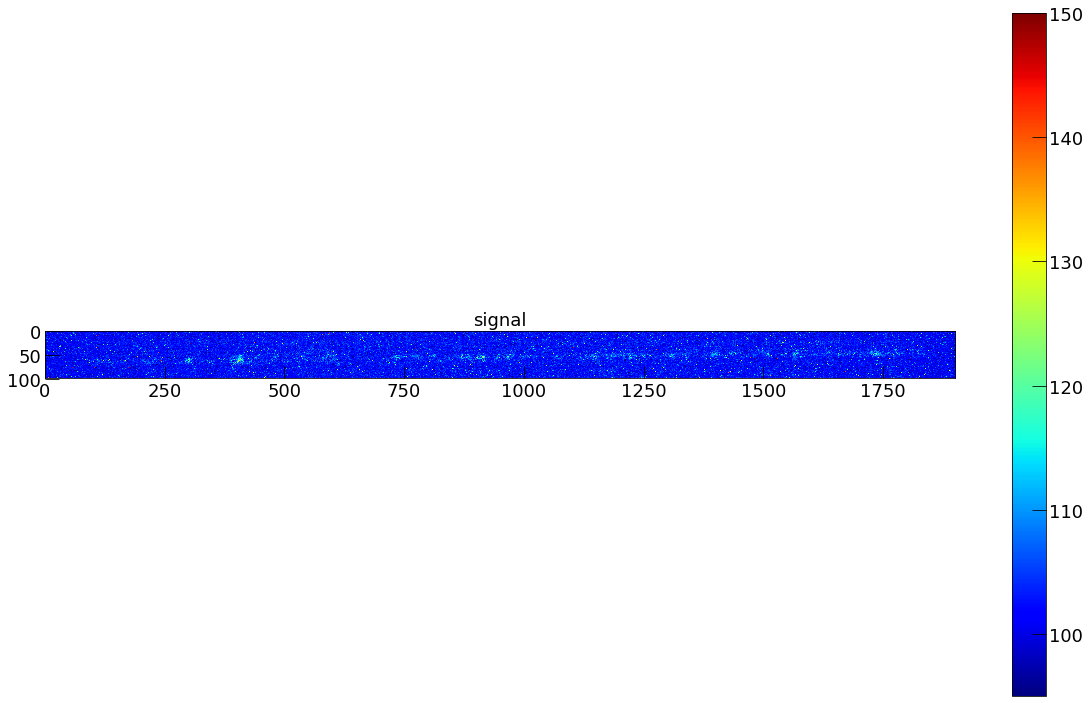

In [33]:
cy.set_atlas_style("large")
plt.imshow(image[970:1070, 100:2000], vmin=cimin,vmax=cimax, cmap='jet')
plt.colorbar(shrink=0.6)
plt.title("signal")
plt.show()

offsset: -20
offsset: -13
offsset: -16


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


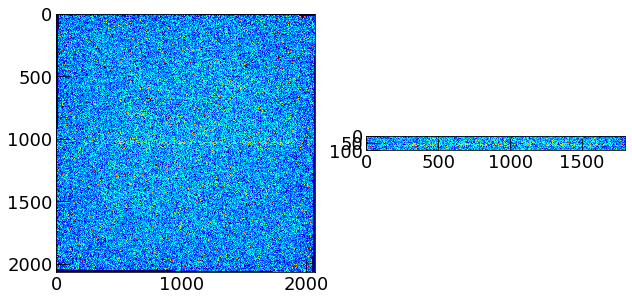

In [202]:
import scipy.ndimage
m      = -0.01
theta  = np.arctan(m)*(180.0/np.pi)
imgR   = scipy.ndimage.interpolation.rotate(image, theta)
m_imgR = scipy.ndimage.interpolation.rotate(m_image, theta)
s_imgR = scipy.ndimage.interpolation.rotate(s_image, theta)
print ("offsset: %d" % (x_resolution*m))
print ("offsset: %d" % (1300*m))
print ("offsset: %d" % (1600*m))
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgR, vmin=cimin,vmax=cimax, cmap='jet')
ax[1].imshow(imgR[970:1070,200+int(1300*m):2000+int(1490*m)], vmin=cimin,vmax=cimax, cmap='jet')

plt.show()

Th mean = 104.35, sigma = 2.19
Signal: 103512 photons 941.03 keV


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


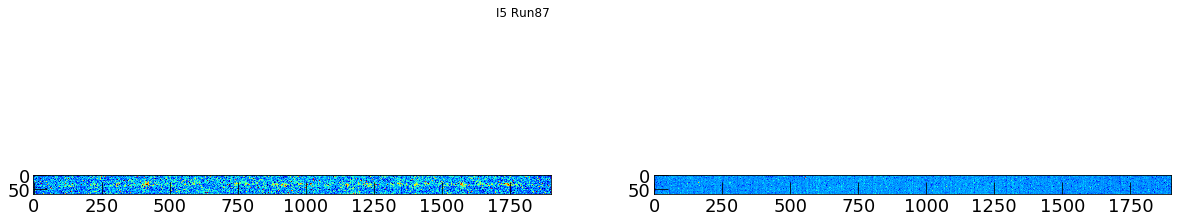

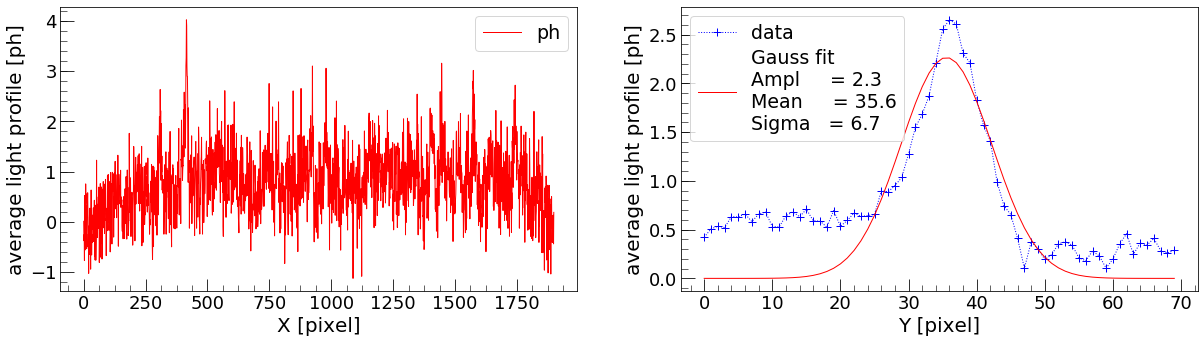

Int light in X: 1478.65 [ph*pixel]
Int light in Y: 54.13 [ph*pixel]
Light, X: 102837.53 / Y: 103505.77 [ph]


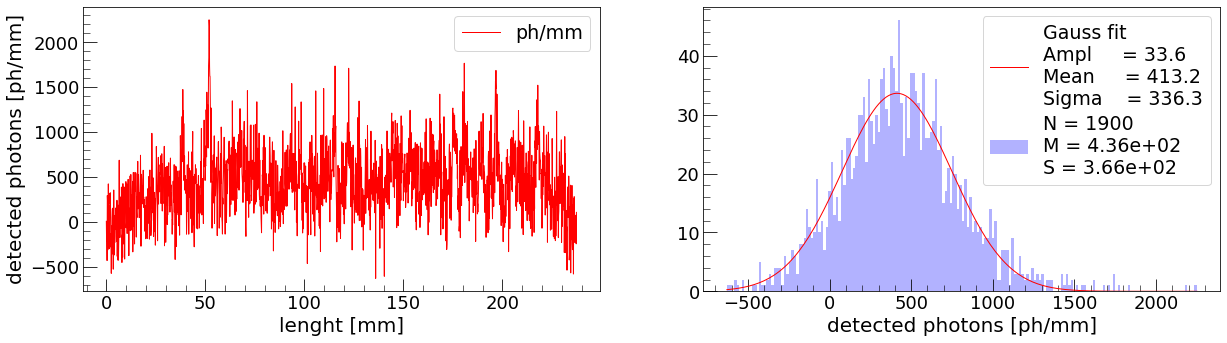

In [209]:

cy.set_atlas_style('long')

#### figura 3 run 740 alfettissima [945:970,1375:1405] 
ibck        = m_image[945:970,1375:1405]
imageCutted = image[945:970,1375:1405]
th_image  = np.round(m_image + nsigma*s_image)[945:970,1375:1405]
#### figura 3 run 740 alfetta [1330:1370,390:430]
#ibck        = m_image[1330:1370,390:430]
#imageCutted = image[1330:1370,390:430]
#th_image  = np.round(m_image + nsigma*s_image)[1330:1370,390:430]
#### figura 3 run 740 protone [1600:1680,1300:1490]
#ibck        = m_image[1600:1680,1300:1490]
#imageCutted = image[1600:1680,1300:1490]
#th_image    = np.round(m_image + nsigma*s_image)[1600:1680,1300:1490]
#### figura 3 run 740 protone [1600:1680,1300:1490] rotaed
#ibck        = m_imgR[1710:1790,1680:1490+400]
#imageCutted = imgR[1710:1790,1680:1490+400]
#th_image    = np.round(m_imgR + nsigma*s_imgR)[1710:1790,1680:1490+400]
##### figura 3 run 740 alfona [650:690,700:950]
#ibck        = m_image[650:690,700:950]
#imageCutted = image[650:690,700:950]
#th_image    = np.round(m_image + nsigma*s_image)[650:690,700:950]
###### figura 53 run 740 alfetta [950:1000, 700:760]
ibck        = m_image[950:1000, 700:760]
imageCutted = image[950:1000, 700:760]
th_image    = np.round(m_image + nsigma*s_image)[950:1000, 700:760]
###### figura 6 run 88 [800:900, 200:2000]
ibck        = m_image[830:890, 200:2000]
imageCutted = image[830:890, 200:2000]
th_image    = np.round(m_image + nsigma*s_image)[830:890, 200:2000]
###### figura 6 run 87 [1000:1100, 200:2000]
ibck        = m_image[1015:1065, 200:2000]
imageCutted = image[1015:1065, 200:2000]
th_image    = np.round(m_image + nsigma*s_image)[1015:1065, 200:2000]
###### figura 5 run 87 [1000:1100, 200:2000]
ibck        = m_image[1000:1050, 200:2000]
imageCutted = image[1000:1050, 200:2000]
th_image    = np.round(m_image + nsigma*s_image)[1000:1050, 200:2000]
###### figura 5 run 87 [970:1070, 100:2000]
ibck        = m_image[170:270, 100:2000]
imageCutted = image[970:1070, 100:2000]
th_image    = np.round(m_image + nsigma*s_image)[170:270, 100:2000]
###### figura 5 run 87 [970:1070, 100:2000]
ibck        = m_imgR[200:270, 100:2000]
imageCutted = imgR[1000:1070, 100:2000]
th_image    = np.round(m_imgR + nsigma*s_imgR)[200:270, 100:2000]




print ("Th mean = %.2f, sigma = %.2f" % (th_image.mean(), np.sqrt(th_image.var())))

#### Nonalizzazioni 450 0.1 ph/keV
print ("Signal: %d photons %.2f keV" % (imageCutted.sum()-ibck.sum(), (imageCutted.sum()-ibck.sum())/(0.11*1000)))
#
fig, ax = plt.subplots(1,2)

im = ax[0].imshow(imageCutted, vmin=cimin,vmax=cimax, cmap='jet')
im = ax[1].imshow(ibck, vmin=cimin,vmax=cimax, cmap='jet')
#fig.colorbar(im, ax=ax)
plt.suptitle("I%d Run%d" % (traccia, run), y=1.05)
plt.show()

fig, ax = plt.subplots(1,2)
#
Xproj       = np.mean(imageCutted-ibck, axis=0)
Yproj       = np.mean(imageCutted-ibck, axis=1)

xx          = np.arange(0, imageCutted.shape[1])
xy          = np.arange(0, imageCutted.shape[0])
#

ax[0].plot(xx, Xproj, 'r-', label='ph')
ax[0].set_ylabel('average light profile [ph]')
ax[0].set_xlabel('X [pixel]')
ax[0].minorticks_on()
ax[0].legend()

x0 = xy.size/2
s0 = 5
a0 = max(Yproj)
ax[1].plot(xy, Yproj, 'b+:', label='data')
try:
    popt,pcov = curve_fit(my.Gauss3, xy, Yproj, p0=[a0, x0, s0])
    ax[1].plot(xy, my.Gauss3(xy, *popt), 'r-',
           label='Gauss fit   \nAmpl     = %.1f\nMean     = %.1f\nSigma   = %.1f' %
           (popt[0], popt[1], popt[2]))
except:
    print ("fit error")

ax[1].set_xlabel('Y [pixel]')
ax[1].set_ylabel('average light profile [ph]')
ax[1].minorticks_on()
ax[1].legend()
plt.show()


fig, ax = plt.subplots(1,2)
DDY = np.trapz(Yproj,xy)
DDX = np.trapz(Xproj,xx)
print("Int light in X: %.2f [ph*pixel]" % DDX)
print("Int light in Y: %.2f [ph*pixel]" % DDY)
print("Light, X: %.2f / Y: %.2f [ph]" % (DDY*xx.size, DDX*xy.size))


eres = Xproj*xy.size/pixelscale

ax[0].plot(xx*pixelscale, eres, 'r-', label='ph/mm')
ax[0].set_ylabel('detected photons [ph/mm]')
ax[0].set_xlabel('lenght [mm]')
ax[0].legend()
ax[0].minorticks_on()
bins = int(eres.size/10)
ax[1].hist(eres, bins=bins, color='blue', alpha=0.3, label='N = %d\nM = %.2e\nS = %.2e' % 
       (np.size(eres), np.mean(eres), np.sqrt(np.var(eres))))
x    = np.linspace(eres.min(), eres.max(), bins)
y, _ = np.histogram(eres, bins=bins)
a0 = np.max(y)
x0 = np.mean(eres)
s0 = np.sqrt(np.var(eres))
try:
    popt,pcov = curve_fit(my.Gauss3, x, y, p0=[a0, x0, s0])
    x = np.linspace(eres.min(), eres.max(), bins)
    ax[1].plot(x, my.Gauss3(x, *popt), 'r-',
           label='Gauss fit   \nAmpl     = %.1f\nMean     = %.1f\nSigma    = %.1f' %
           (popt[0], popt[1], popt[2]))
except:
    print("fit error")

ax[1].set_xlabel('detected photons [ph/mm]')
ax[1].minorticks_on()
ax[1].legend()
plt.show()

In [199]:


#nsigma    = 1.0  ####### se si vuole cambaire cut
#th_image  = np.round(m_image + nsigma*s_image)

#### figura 3 run 740 alfettissima [945:970,1375:1405]
ibck        = m_image[945:970,1375:1405]
imageCutted = image[945:970,1375:1405]
th_image  = np.round(m_image + nsigma*s_image)[945:970,1375:1405]

#### figura 3 run 740 alfetta [1330:1370,390:430]
#ibck        = m_image[1330:1370,390:430]
#imageCutted = image[1330:1370,390:430]
#th_image  = np.round(m_image + nsigma*s_image)[1330:1370,390:430]
#### figura 3 run 740 protone [1500:1750,1250:1500]
#ibck        = m_image[1500:1750,1250:1500]
#imageCutted = image[1500:1750,1250:1500]
#th_image    = np.round(m_image + nsigma*s_image)[1500:1750,1250:1500]
#### figura 3 run 740 alfona [600:1000,600:1000]
#ibck        = m_image[500:900,600:1000]
#imageCutted = image[500:900,600:1000]
#th_image    = np.round(m_image + nsigma*s_image)[500:900,600:1000]
#########
ibck        = m_image[950:1000, 700:760]
imageCutted = image[950:1000, 700:760]
th_image    = np.round(m_image + nsigma*s_image)[950:1000, 700:760]
###### figura 5 run 87 [970:1070, 100:2000]
ibck        = m_image[170:270, 100:2000]
imageCutted = image[970:1070, 100:2000]
th_image    = np.round(m_image + nsigma*s_image)[170:270, 100:2000]


print (imageCutted.shape[0], th_image.shape[0])


edges     = (imageCutted > th_image) & (imageCutted < cimax)
points    = np.array(np.nonzero(edges)).T.astype(float)

100 100


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


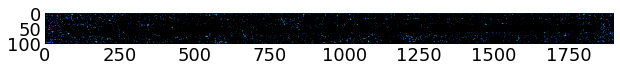

In [200]:
cy.set_atlas_style()
plt.plot(points[:,1], points[:,0], "k.", markersize=1)
plt.imshow(imageCutted, vmin=cimin,vmax=cimax, cmap='jet')
plt.show()

(array([ 49.31863711, 972.0433057 ]), array([-0.00166142,  0.99999862]))
(array([  57.56723891, 1006.54506438]), array([-0.01038643,  0.99994606]))


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


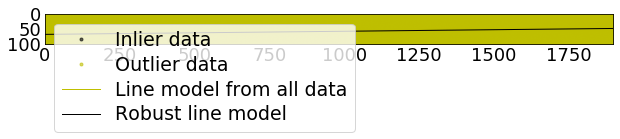

In [201]:
cy.set_atlas_style()
from skimage.measure import LineModelND, ransac
model = LineModelND()
model.estimate(points)

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(points, LineModelND, min_samples=2,
                               residual_threshold=1, max_trials=1000)
print(model.params)
print(model_robust.params)
outliers = inliers == False

# generate coordinates of estimated models
line_x = np.arange(0, imageCutted.shape[1])
line_y = model.predict_y(line_x)
line_y_robust = model_robust.predict_y(line_x)

fig, ax = plt.subplots()
plt.imshow(imageCutted, vmin=cimin,vmax=cimax, cmap='jet')
ax.plot(points[inliers, 1], points[inliers, 0], '.k', alpha=0.6,
        label='Inlier data', markersize=6)
ax.plot(points[outliers, 1], points[outliers, 0], '.y', alpha=0.6,
        label='Outlier data', markersize=6)
ax.plot(line_y, line_x, '-y', label='Line model from all data')
ax.plot(line_y_robust, line_x, '-k', label='Robust line model')
ax.legend()
plt.xlim(0,imageCutted.shape[1]-1)
plt.ylim(imageCutted.shape[0]-1,0)
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


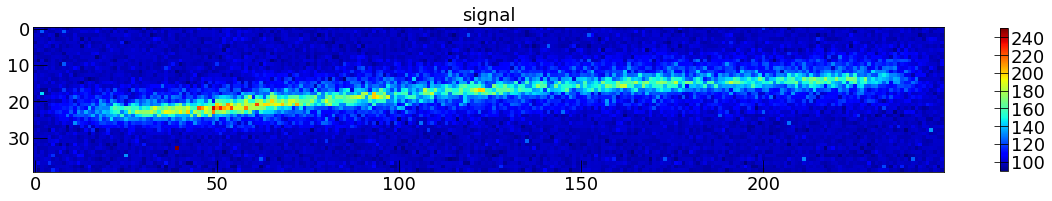

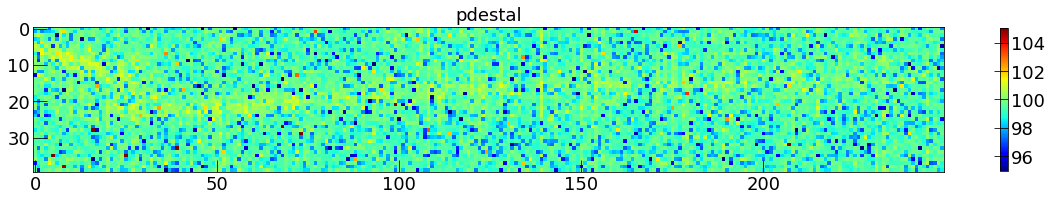

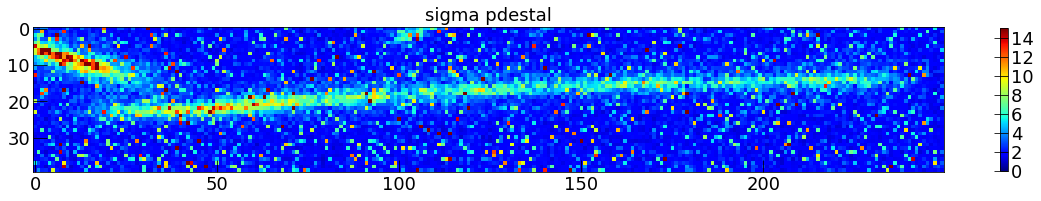

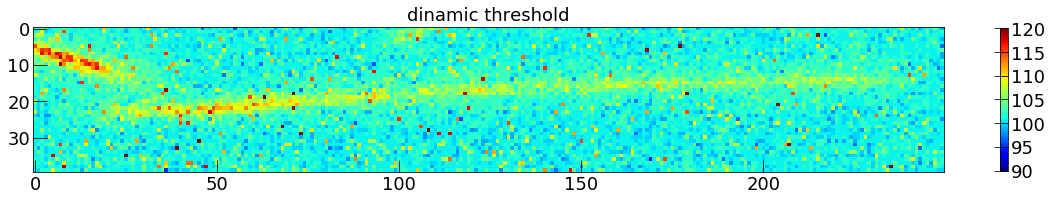

In [9]:
cy.set_atlas_style("long")
plt.imshow(image[650:690,700:950], vmin=90,vmax=250, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("signal")
plt.show()
plt.imshow(m_image[650:690,700:950], vmin=95,vmax=105, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("pdestal")
plt.show()
plt.imshow(s_image[650:690,700:950], vmin=0,vmax=15, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("sigma pdestal")
plt.show()
plt.imshow(th_image, vmin=90,vmax=120, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("dinamic threshold")
plt.show()

In [118]:
np.ones((5,))

array([1., 1., 1., 1., 1.])